Natalia Brzozowska
# Laboratorium 11
## Generatory liczb losowych

***
## Zadanie 1
## Testowanie generatorów liczb losowych

Dla obydwu generatorów liczb losowych (Mersenne Twister oraz PCG64) oraz dla n = 10, 1000, 5000 wylosuj n liczb losowych pochodzacych z rozkładu jednostajnego i wykonaj nastepujace kroki.
1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. <br> <br>
2. Sprawdz dla ilu liczb spełniona jest nierówność $x_{i}<x_{x+1}$. Ile powinno ich być dla idealnego generatora?<br><br>
3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final i wykorzystaj go do sprawdzenia wylosowanego ciagu liczb. <br><br>

Czy widac różnice pomiedzy generatorami? Czy wraz z rosnacym n coś się zmienia?

***
Poniższa funkcja generate_all() generuje odpowiednie dane korzystając z funkcji get_num(). W funkcji get_num() korzystając z odpowiednich generatorów generowana jest określona liczba danych, które następnie są zwracane. Następnie w funkcji generate_all() rysowane są odpowiednie histogramy dla wylososwanych danych.<br>
Trzecia funkcja check_freq() zlicza ile elementów w wylosowanych danych spełnia zależność $x_{i}<x_{x+1}$ i wypisuje te informacje.

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.special

In [14]:
def get_num(n):
    twister = []
    pcg = []
    gen = np.random.default_rng()
    
    for i in range(n):
        twister.append(random.random())
        pcg.append(gen.random())
    
    return pcg, twister
    
    
def generate_all():
    n=[10,1000,5000]
    pcgs = []
    twisters = []
    
    for el in n:
        p,t = get_num(el)
        pcgs.append(p)
        twisters.append(t)
    
    
    fig, axs = plt.subplots(3,2, figsize=(20,17))
    fig.subplots_adjust(hspace=0.5)

    axs[0,0].hist(pcgs[0],10, color='lightgreen', edgecolor='black')
    axs[0,0].set_title("PCG64 - 10 elementów")
    axs[0,0].set_xlabel('liczba')
    axs[0,0].set_ylabel('ilość')
    
    axs[0,1].hist(twisters[0],10, color ='yellow', edgecolor='black')
    axs[0,1].set_title("Mersenne Twister - 10 elementów")
    axs[0,1].set_xlabel('liczba')
    axs[0,1].set_ylabel('ilość')
    
    axs[1,0].hist(pcgs[1],10, color = 'green', edgecolor='black')
    axs[1,0].set_title("PCG64 - 1000 elementów")
    axs[1,0].set_xlabel('liczba')
    axs[1,0].set_ylabel('ilość')
    
    axs[1,1].hist(twisters[1],10, color = 'orange', edgecolor='black')
    axs[1,1].set_title("Mersenne Twister - 1000 elementów")
    axs[1,1].set_xlabel('liczba')
    axs[1,1].set_ylabel('ilość')
    
    axs[2,0].hist(pcgs[2],10, color = 'darkgreen', edgecolor='black')
    axs[2,0].set_title("PCG64 - 5000 elementów")
    axs[2,0].set_xlabel('liczba')
    axs[2,0].set_ylabel('ilość')
    
    axs[2,1].hist(twisters[2],10, color = 'darkorange', edgecolor='black')
    axs[2,1].set_title("Mersenne Twister - 5000 elementów")
    axs[2,1].set_xlabel('liczba')
    axs[2,1].set_ylabel('ilość')
    
    return pcgs, twisters



def check_freq(pcgs, twisters):
    pcg_freq = []
    twist_freq = []
    
    for it in range(3):
        p=0
        t=0
        pcg = pcgs[it]
        twist = twisters[it]
        
        for el in range(len(pcg)-1):
            if(pcg[el]<pcg[el+1]):
                p+=1
            if(twist[el]<twist[el+1]):
                t+=1
        pcg_freq.append(p)
        twist_freq.append(t)
    
    print('10 elementów - PCG64:',pcg_freq[0], 'Mersenne Twister:', twist_freq[0] )
    print('1000 elementów - PCG64:',pcg_freq[1], 'Mersenne Twister:', twist_freq[1] )
    print('5000 elementów - PCG64:',pcg_freq[2], 'Mersenne Twister:', twist_freq[2] )
        

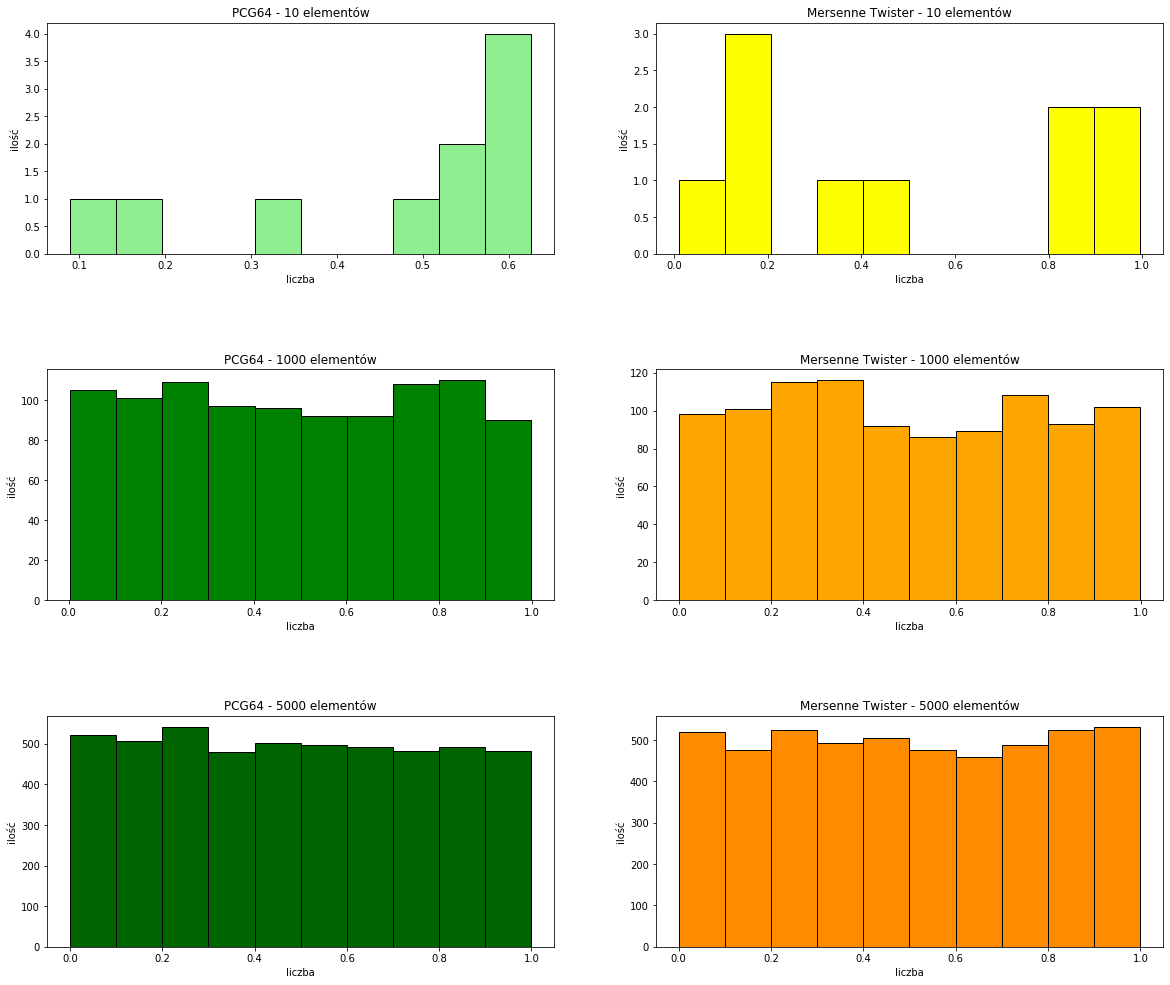

In [15]:
p,t = generate_all()

***
#### Wnioski
Na powyższych histogramach, można zaobserowować, że dane generowane przez generatowy są rozłożone mniej więcej równo w każdym z dziesięciu przedziałów. <br> Dla 10 elementów dane nie rozkłądają się równo, jednak jest to zbyt mała ilosć danych by móc powiedzieć, czy generatowy losują odpowiednio. Dla 1000 elementów słupki przedziałów są prawie równe, jednak najmniejsza różnica w wysokościach słupków histogramów występuje dla 5000 danych. Można zatem powiedzieć, że im więcej danych losujemy, tym bardziej równo są one rozłożone w odpowiednich przedziałach.<br>
Wydaje się również że słupki histogramów generatora PCG64 (zielony) są równiejsze, jednak może być to również przypadek.

In [16]:
check_freq(p,t)

10 elementów - PCG64: 4 Mersenne Twister: 4
1000 elementów - PCG64: 495 Mersenne Twister: 501
5000 elementów - PCG64: 2535 Mersenne Twister: 2510


***
#### Wnioski
Nierówność $x_{i} < x_{i+1}$ jest spełniona dla ok. 50% przypadków w obu generatorach, dla każdej z trzech wartości n. Wydaje mi się, że właśnie tyle powinno być dla idealnego generatora, ponieważ z mniej więcej takim samym prawdopodobieństwem może on wylosować kolejną wartość mniejszą lub większą. Oznacza to, że kolejna losowana wartość nie powinna zależeć od poprzedniej.


***
Poniżej zaimplementowałam pierwszy test opisany w załączonym artykule. Wylosowanym wartościom >= 0.5 przypisuje wartość 1, a tym <0.5 wartość 0. <br>
W funkcji frequency_monobit_test() najpierw zamieniam wektor według opisanych zasad wykorzystując funkcję change_to_10(), potem zliczam różnicę między wystąpieniami zer i jedynek w tablicy, a następnie obliczam p-value, na podstawie której, można określić czy liczby są przypadkowe czy nie.<br>
Funkcja check_numbers() przeprowadza test dla wszytskich wylosowanych danych.

In [17]:
def change_to_10(vec):
    for i in range(len(vec)):
        if vec[i]<0.5:
            vec[i]=0
        else:
            vec[i]=1

    return vec
            
    
def frequency_monobit_test(vec):
    vec = change_to_10(vec)
    n = len(vec)
    s = 0

    for e in vec:
        if e==1:
            s+=1
        else:
            s-=1
            
    sobs = np.abs(s)/np.sqrt(n)
    pval = scipy.special.erf(sobs/np.sqrt(2))
    
    if(pval>=0.01):
        print('Liczby są przypadkowe. P-val:',pval,'\n')
    else:
        print('Liczby nie są przypadkowe. P-val:',pval,'\n')

        
def check_numbers(pcgs, twisters):
    for v in pcgs:
        print('PCG64 - ilość elementów:',len(v))
        frequency_monobit_test(v)
    for v in twisters:
        print('Mersenne Twister - ilość elementów:',len(v))
        frequency_monobit_test(v)

In [18]:
check_numbers(p,t)

PCG64 - ilość elementów: 10
Liczby są przypadkowe. P-val: 0.4729107431344619 

PCG64 - ilość elementów: 1000
Liczby są przypadkowe. P-val: 0.2481703659541507 

PCG64 - ilość elementów: 5000
Liczby są przypadkowe. P-val: 0.8733261583878895 

Mersenne Twister - ilość elementów: 10
Liczby są przypadkowe. P-val: 0.4729107431344619 

Mersenne Twister - ilość elementów: 1000
Liczby są przypadkowe. P-val: 0.8358964931742131 

Mersenne Twister - ilość elementów: 5000
Liczby są przypadkowe. P-val: 0.40900945341969397 



***
#### Wnioski
Jeżeli p-value jest mniejsza niż 0.01, to liczby w danym zbiorze nie są przypadkowe. Im bliższa zeru będzie wartość s w teście, tym bardziej liczby będą przypadkowe.<br>
Liczby wylosowane przez generatory mają p-value większą od 0.01, a więc są przypadkowe.

***
### Wnioski
Wyniki obu generatorów w przeprowadzonych porównaniach i testach były bardzo zbliżone. Wydaje się że dane wylosowane przez generator PCG64 są bardziej równomiernie rozłożone. Jednak może być to tylko kwestia losowa. <br><br>
Wraz z rosnącym n rozłożenie wylosowanych liczb jest bardziej równomierne. Również większy procent liczb spełnia nierówność $x_{i} < x_{i+1}$. Te zachowania występują dla obu generatorów.

***
## Zadanie 2
## Generowanie liczb z rozkładu normalnego

1. Zaimplementuj generator liczb losowych pochodzacych z rozkładu normalnego za pomoca metody Boksa-Mullera i zaprezentuj wyniki dla n = 10, 100, 5000 wygenerowanych liczb. Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie standardowe jako parametry.
<br><br>
2. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. Na tym samym wykresie umieść funkcje gestości prawdopodobienstwa rozkładu normalnego o takich samych parametrach.
<br><br>
3. Wykonaj test statystyczny Shapiro-Wilka, przedstaw uzyskaną p-wartość, informacje czy hipoteza zerowa została przyjeta/odrzucona dla a = 0,05 i czy w zwiazku z tym są podstawy do stwierdzenia że liczby pochodzą z rozkładu normalnego.

***
Zaimplementowałam generator liczb losowych za pomocą metody Boksa-Mullera. Bierze on dwie losowa wartości i na ich podstawie (uwzględniając podane jako argumenty - średnią i odchylenie standardowe) generujue dwie wartości należące do rozkładu normalnego. Funkcja Box_Muller() generuje tablice zawierającą wartości generowane przez metodę Boksa-Mullera.<br><br>
Funkcja do_everything() tworzy tablice o podanej liczbie elementów (wykorzystując generator Boksa-Mullera), nastęnie rysuje rozkłady wylosowanych liczb wraz z funkcją gęstości prawdopodobieństwa rozkładu normalnego. Oraz, dla każdej tabeli liczb, sprawdza testem Shapiro-Wilka poprawność danych - czy dane należą do rozkładu normalnego.

In [189]:
import scipy.stats

In [197]:
def Box_Muller(sr,odchyl,size):
    flag = 0
    tab = []
    
    for i in range(size):
        if(flag == 1):
            flag = 0
            tab.append(z1*odchyl + sr)
        else:
            u1 = random.random()
            u2 = random.random()
            z0 = np.sqrt(-2 * np.log(1-u1))*np.cos(2*np.pi*u2)
            z1 = np.sqrt(-2 * np.log(1-u1))*np.sin(2*np.pi*u2)
            tab.append(z0*odchyl+ sr)
    
    return tab

def do_everything(w,s):
    n = [10,100,5000]
    tabs = []
    maxv=0
    minv=0
    
    for siz in n:
        tabs.append(Box_Muller(w,s,siz))
    
    mini = min(tabs[2])
    maxi = max(tabs[2])
    
    x = np.arange(-3,3,0.05)
    y = scipy.stats.norm.pdf(x,0,1)

    fig, axs = plt.subplots(3,1, figsize=(20,25))
    fig.subplots_adjust(hspace=0.5)

    axs[0].plot(x,y)
    axs[0].hist(tabs[0],10, color='lightgreen', edgecolor='black', density=True)
    axs[0].set_title("Wykres 2.1 - 10 elementów wylosowanych metodą Boksa-Mullera")
    axs[0].set_xlabel('liczba')
    axs[0].set_ylabel('ilość')
    
    
    axs[1].plot(x,y)
    axs[1].hist(tabs[1],10, color ='yellow', edgecolor='black', density=True)
    axs[1].set_title("Wykres 2.2 - 100 elementów wylosowanych metodą Boksa-Mullera")
    axs[1].set_xlabel('liczba')
    axs[1].set_ylabel('ilość')
    
    axs[2].plot(x,y)
    axs[2].hist(tabs[2],10, color = 'orange', edgecolor='black', density=True)
    axs[2].set_title("Wykres 2.3 - 5000 elementów wylosowanych metodą Boksa-Mullera")
    axs[2].set_xlabel('liczba')
    axs[2].set_ylabel('ilość')
    
    for i in range(len(tabs)):
        wret,pval = scipy.stats.shapiro(tabs[i])
        if(pval>=0.05):
            print('Rozkład 2 .',i,'jest normalny. P-val:',pval,'\n')
        else:
            print('Rozkład 2 .',i,'nie jest normalny. P-val:',pval,'\n')

Rozkład 2 . 0 jest normalny. P-val: 0.4039905071258545 

Rozkład 2 . 1 jest normalny. P-val: 0.6616265773773193 

Rozkład 2 . 2 jest normalny. P-val: 0.6838100552558899 



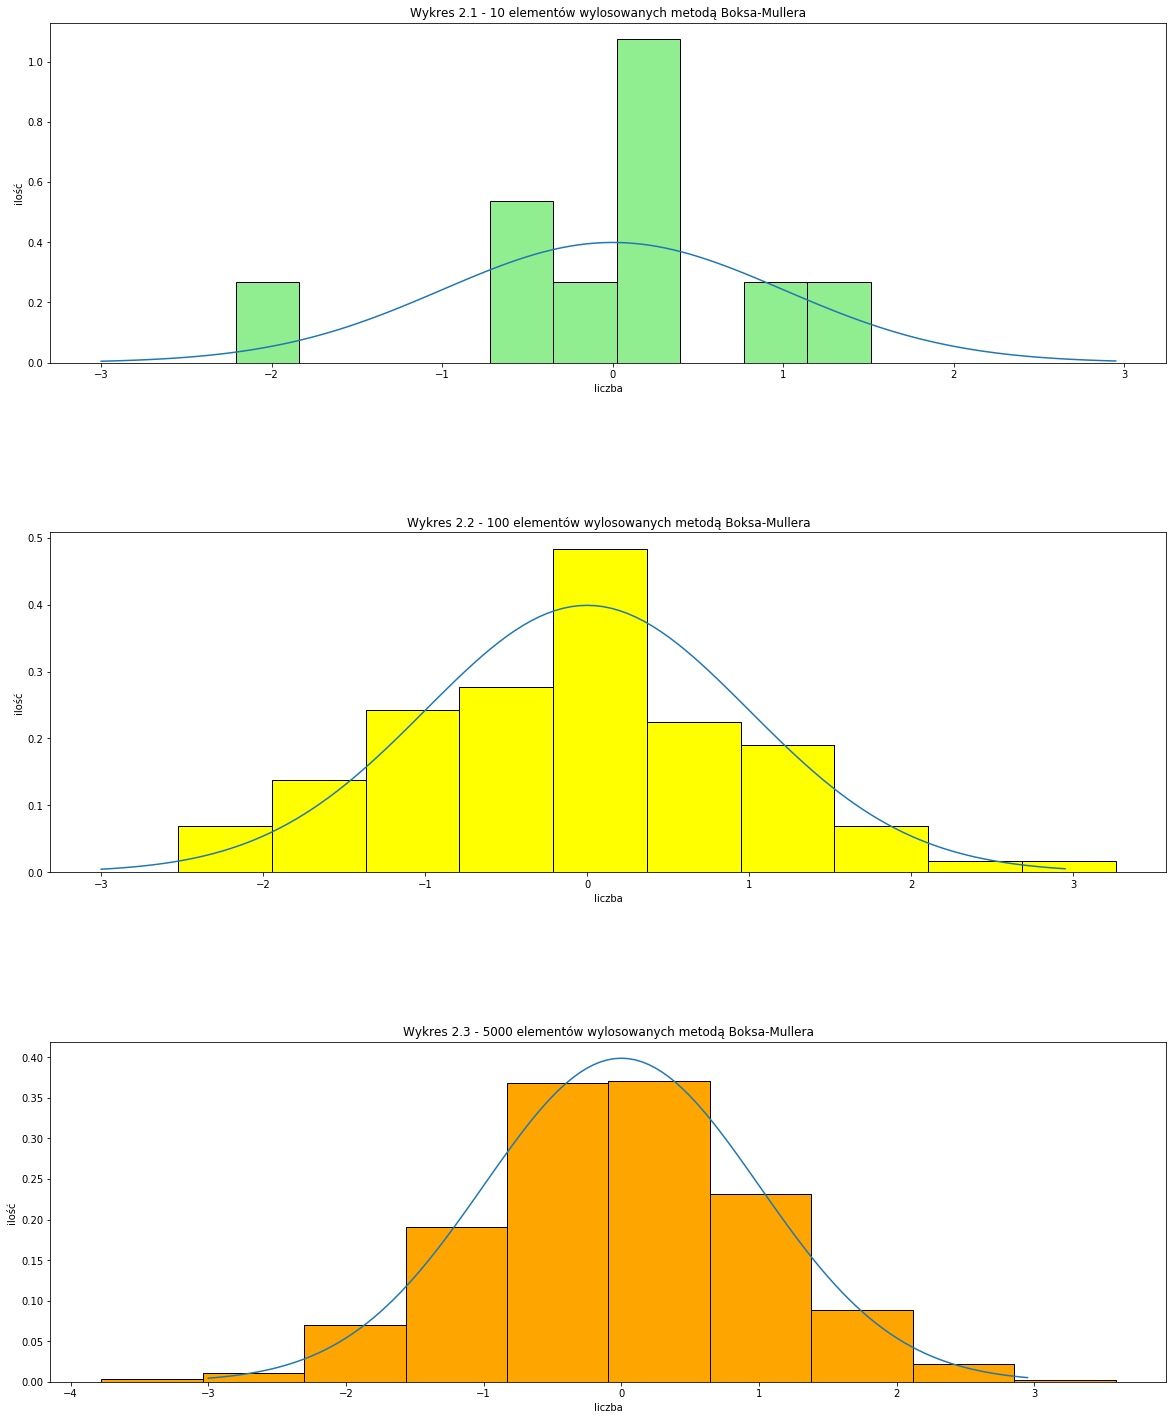

In [198]:
do_everything(0,1)

***
## Wnioski
Na wykresach można zaobserwować, że wygenerowane dane mnej więcej zgadzają się z funkcją gestości prawdopodobieństwa rozkładu normalnego. Im więcej danych zostało wygenerowanych tym bardziej układ histogramu przypomina wykres tejże funkcji. Zatem im więcej lcz losujemy tym bardziej ich rozkład jest rozkładem normalnym.<br><br>
Test Shapiro-Wilka zakwalifikował wszystkie dane jako należące do rozkładu normalnego (hipoteza zerowa została przyjęta). Jednak, żeby mieć pewność, że generowane dane będą z rozkładu normalnego należałoby wygenerować większą ich ilość.

***
## Zadanie 3
## Metoda Monte Carlo
Napisz funkcje która zwróci przybliżoną wartość liczby pi wykorzystujacą metodę Monte
Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować
liczbe wylosowanych punktów jako parametr. Zwizualizuj koło, zaznaczając na jednym
kolorem punkty które trafiły do jego wnetrza, a drugim te które trafiły na zewnatrz. Na
wykresie zwizualizuj bład bezwzględny wraz z rosnacą liczbą punktów.

***
Zaimplementowałam funkcję realizującą metodę Monte Carlo. Dla każdego n losuje dwie liczby z przedziału [-1,1), nastęnie sprawdza, czy wylosowane liczby tworzą punkt należący do okręgu o środku w (0,0) i promieniu 1. Jeżeli tak to zwiększa odpowiedni licznik i dodaje liczby do odpowiednich tabeli. Analogicznie zachowuje sie gdy punkt nie należy do okręgu. Dla każdego wylosowanego punktu funkcja oblicza aktualną wartość liczby pi (biorąc pod uwagę wcześniej wylosowane punkty) i oblicza błąd bezwzględny wyznaczonej liczby pi.

In [206]:
def Monte_Carlo(n):
    inxs = []
    inys = []
    outxs = []
    outys = []
    inp = 0 
    outp = 0
    err = []
    
    for i in range(n):
        x = 2*random.random()-1
        y = 2*random.random()-1
        
        if( x**2 + y **2 <= 1):
            inp += 1
            inxs.append(x)
            inys.append(y)
        else: 
            outp += 1
            outxs.append(x)
            outys.append(y)
        
        pi = (4*inp)/n
        err.append(np.abs(np.pi-pi))
        
    return [inxs,inys],[outxs,outys], pi, err


def draw_circle(ins,outs):
    plt.figure(figsize=(12,12))
    plt.plot(ins[0], ins[1],  'o', color = 'orange')
    plt.plot(outs[0], outs[1],  'o', color='olive')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title('Punkty wewnątrz i na zewnątrz okręgu (Monte Carlo)')
    plt.show()
    

def draw_pi(n, ys):
    xs = np.arange(0,n,1)
    plt.figure(figsize=(6,6))
    plt.plot(xs,ys)
    plt.ylabel('błąd bezwzględny')
    plt.xlabel('n - ilość punktów')
    plt.title('Błąd bezwzględny obliczonej wartości pi w zależności od ilości punktów')
    
    plt.show()

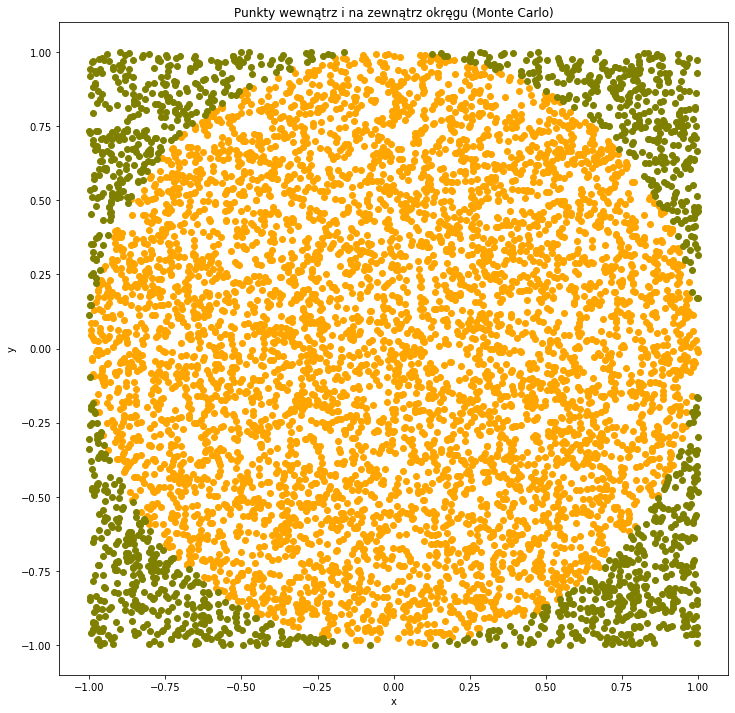

Przybliżona wartość liczby pi: 3.125142857142857


In [207]:
ins, outs, pi, err = Monte_Carlo(7000)
draw_circle(ins,outs)
print('Przybliżona wartość liczby pi:',pi)

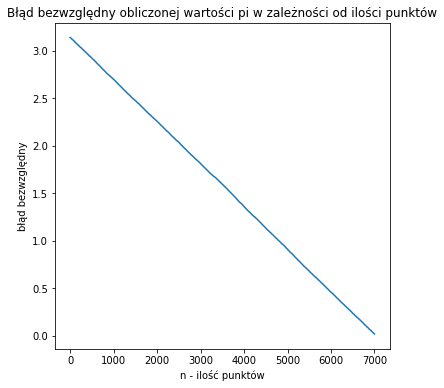

In [208]:
draw_pi(7000,err)

***
### Wnioski
Wyznaczona wartość liczby pi, jest rzeczywiście przybliżona. Prawdopodobnie dla większej ilości punktów wartość ta byłaby bliższa prawdziwej wartości. Tezę tą popiera również wykres błędu w zależności od ilości punktów na wykresie. Prosta na tym wykresie jest stale malejąca, zatem dla większej ilości punktów błąd jest bliższy seru.